# 🏠 ChiHome Price Analyzer 🏠
## Progress Report - Team 14

**Team Members:**
- Grazvydas Revuckas(GrazGraz)
- Jonathan Hung(jonathanhungc)
- Dhimitri Dinella(micho96)
- Reem Sheikh(rsheikhl8)

**GitHub Repository:** https://github.com/cs418-fa24/project-check-in-team-14/tree/main

## Project Introduction

We are analyzing Chicago home price data from Zillow to assist home buyers/investors in making informed decisions by understanding property value trends across different neighborhoods.

Some Questions we are inestigating:

1. How have home values changed in different Chicago neighborhoods over the past few years?
2. Which neighborhoods have seen the biggest increases in home prices? Which neighborhoods have seen the biggest decreases in home prices?
3. Which areas might be good investment opportunities based on price trends?



## Changes from Initial Proposal

Since our initial project proposal slides, we have simplified our scope to create a more focused and achievable analysis:

**Removed from Scope:**
- Complex geographical heat maps.
- Analysis of property features (bedrooms, bathrooms, square footage).
- Both Zillow and Redfin data (focusing only on Zillow for consistency).

**Added to Scope:**
- Focused analysis on straightforward price trends using Zillow data
- Simple, clear visualizations that are easy to interpret
- Time series analysis showing price changes over years

**Reasoning:**
1. **Data Consistency**
  - Using Zillows data only makes sure we are using a more consistent and reliable dataset
  - Takes away the complexity of merging different data sources

2. **Project Feasibility**
  - Simplified visualizations ensure we can deliver high-quality analysis within the timeline
  - Focusing on key price trends allows for clearer, more meaningful insights

3. **Core Value Delivery**
  - Despite the simplified scope, our analysis still achieves the main goal of helping people understand neighborhood price trends
  - Clear, straightforward, easy to interpret presentations are often more valuable than complex featuresble than complex featureses were made]

## Data Cleaning 

In [19]:

import pandas as pd
import numpy as np

df = pd.read_csv('Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

chicago_df = df[df['City'] == 'Chicago']

date_columns = [col for col in chicago_df.columns if col.startswith('20')]
columns_to_keep = ['RegionName', 'City', 'State'] + date_columns
clean_df = chicago_df[columns_to_keep]

melted_df = pd.melt(clean_df,
                    id_vars=['RegionName', 'City', 'State'],
                    value_vars=date_columns,
                    var_name='Date',
                    value_name='Price')

melted_df['Date'] = pd.to_datetime(melted_df['Date'])
melted_df = melted_df.dropna(subset=['Price'])
melted_df = melted_df.sort_values(['RegionName', 'Date'])

melted_df.to_csv('cleaned_chicago_housing_data.csv', index=False)

## Data Cleaning Process


We loaded the raw Zillow dataset containing home values for all cities in the United States. The data set contains data covering month/year values for single-family homes and condos. Then we filtered out all non-Chicago data, which reduced the dataset from being the entire United States to just our focus area of Chicago neighborhoods. We proceeded to filter by only the essential columns we need, like region name, city, state, and monthly price data, and also removed any unnecessary columns. After doing so, we restructured the data by turning it from a wide format to a long format. Every row represents a unique neighborhood-month combination. This makes time series analysis and visualization easier. Date strings were also converted to datetime format for analysis. Rows with missing price values were removed and sorted by neighborhood and date for easy analysis.

## Exploratory Data Analysis


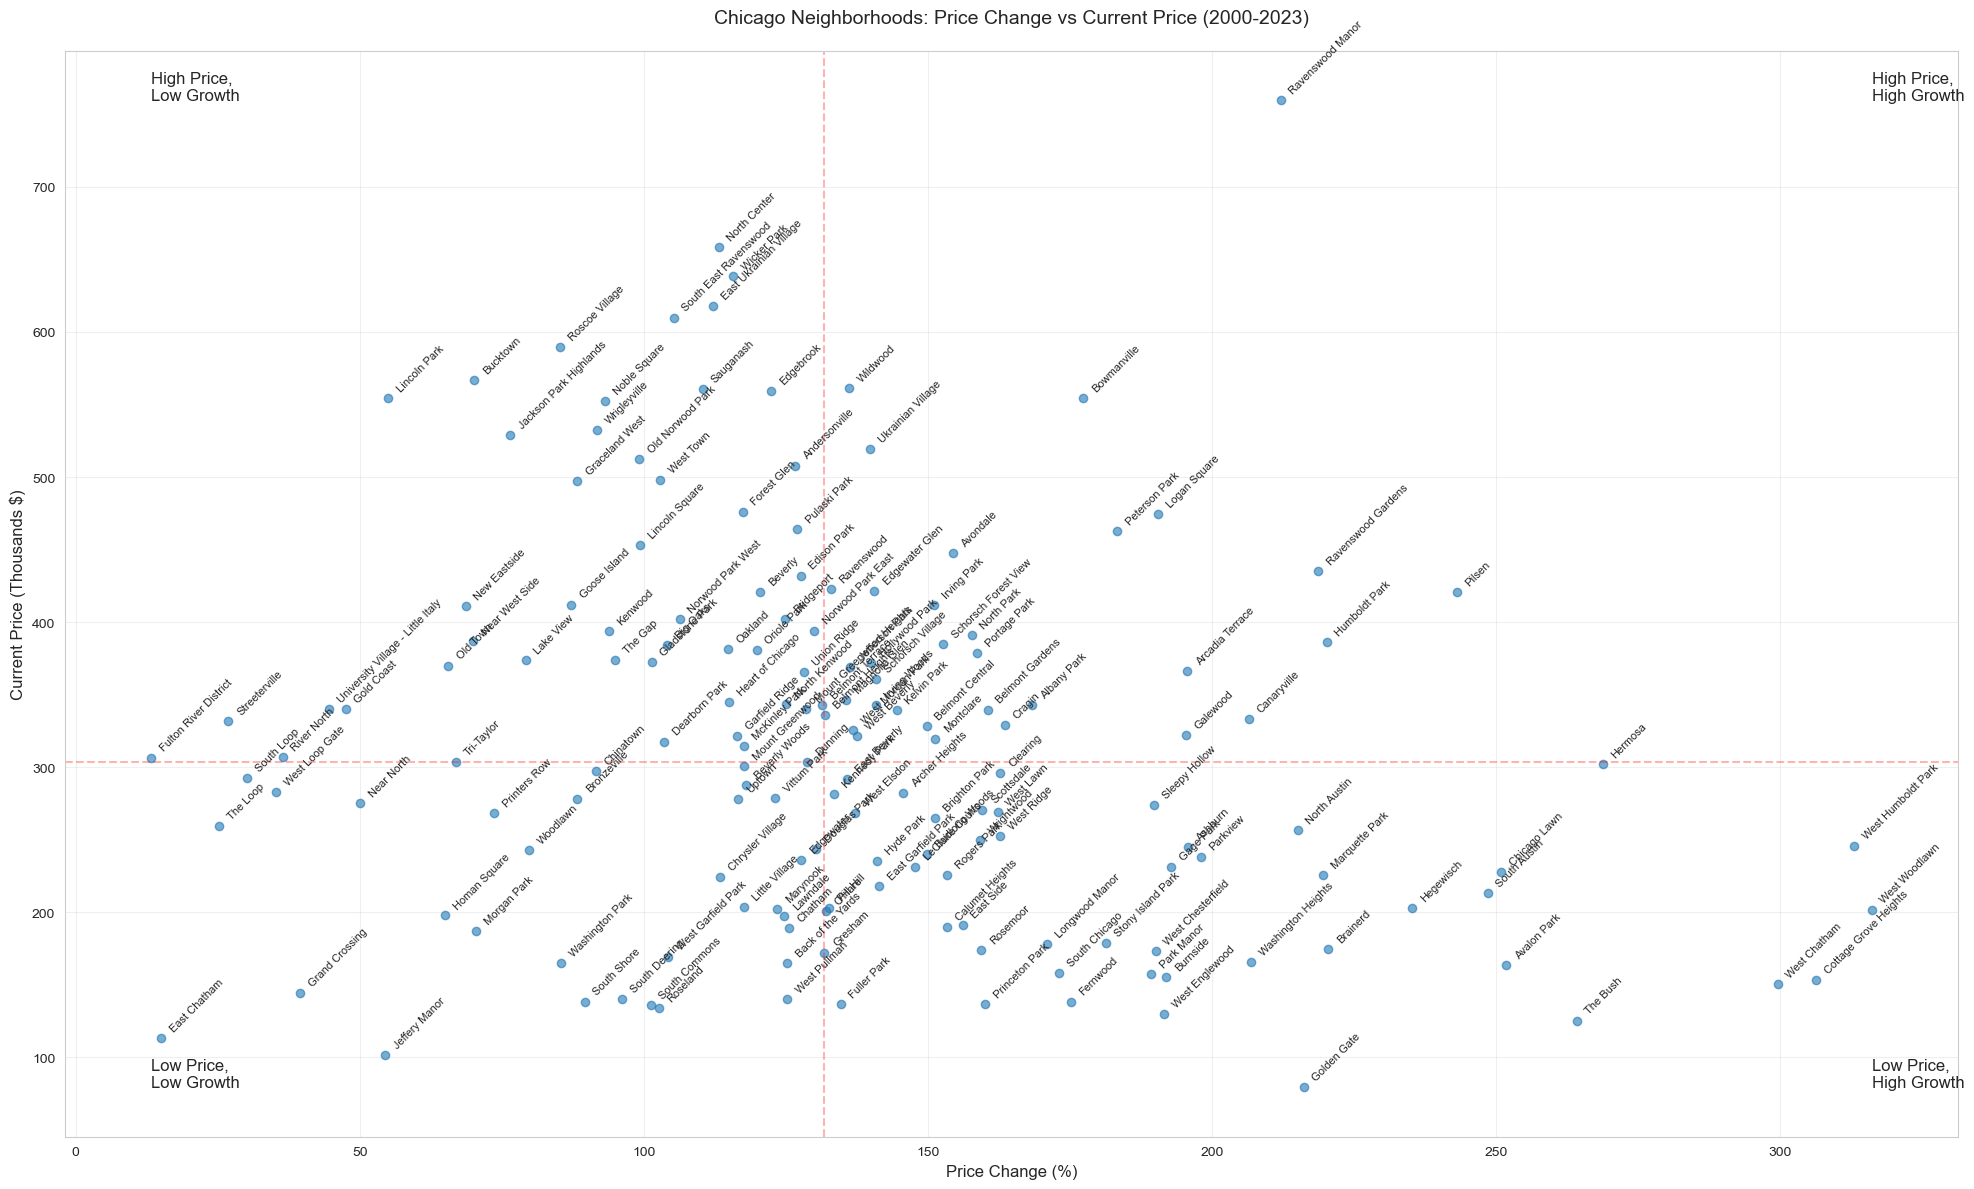

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_chicago_housing_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

end_date = df['Date'].max()
start_date = df['Date'].min()

price_changes = []
for neighborhood in df['RegionName'].unique():
    neighborhood_data = df[df['RegionName'] == neighborhood]
    
    start_price = neighborhood_data[neighborhood_data['Date'] == start_date]['Price'].values
    end_price = neighborhood_data[neighborhood_data['Date'] == end_date]['Price'].values
    
    if len(start_price) > 0 and len(end_price) > 0:
        start_price = start_price[0]
        end_price = end_price[0]
        current_price = end_price  
        pct_change = ((end_price - start_price) / start_price) * 100
        
        price_changes.append({
            'Neighborhood': neighborhood,
            'Price Change %': pct_change,
            'Current Price': current_price
        })

changes_df = pd.DataFrame(price_changes)

plt.figure(figsize=(20, 12))

plt.scatter(changes_df['Price Change %'], 
           changes_df['Current Price']/1000,  
           alpha=0.6)

for idx, row in changes_df.iterrows():
    plt.annotate(row['Neighborhood'], 
                (row['Price Change %'], row['Current Price']/1000),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8,
                rotation=45)

plt.axvline(x=changes_df['Price Change %'].median(), color='red', linestyle='--', alpha=0.3)
plt.axhline(y=changes_df['Current Price'].median()/1000, color='red', linestyle='--', alpha=0.3)

plt.title('Chicago Neighborhoods: Price Change vs Current Price (2000-2023)', fontsize=14, pad=20)
plt.xlabel('Price Change (%)', fontsize=12)
plt.ylabel('Current Price (Thousands $)', fontsize=12)
plt.grid(True, alpha=0.3)

median_price = changes_df['Current Price'].median()/1000
median_change = changes_df['Price Change %'].median()

plt.text(changes_df['Price Change %'].min(), changes_df['Current Price'].max()/1000, 
         'High Price,\nLow Growth', 
         fontsize=12)
plt.text(changes_df['Price Change %'].max(), changes_df['Current Price'].max()/1000, 
         'High Price,\nHigh Growth', 
         fontsize=12)
plt.text(changes_df['Price Change %'].min(), changes_df['Current Price'].min()/1000, 
         'Low Price,\nLow Growth', 
         fontsize=12)
plt.text(changes_df['Price Change %'].max(), changes_df['Current Price'].min()/1000, 
         'Low Price,\nHigh Growth', 
         fontsize=12)

plt.tight_layout()
plt.show()

### Dataset Overview
- 174 Chicago neighborhoods
- January 2000 to September 2023
- Neighborhood names, dates, and home prices

### Interesting Finding
Zillow's data for Englewood only begins in 2014, while most other neighborhoods have data starting from 2000. This data availability gap is intresting because:
- Potential challenges in tracking home values in this area before 2014
- Limited real estate market activity in this neighborhood

### Key Market Insights

1. **Price by Region**
  - North Side Consistently highest prices, averaging $500K-600K
  - South Side Generally lower prices, averaging $100K-200K
  - evidence of geographical price disparity

2. **2008 Housing Crisis**
  - Many neighborhoods showed large price drops during 2008-2012
  - North Side areas recovered faster and surpassed pre-crisis levels
  - Some South Side areas still haven't recovered

3. **Neighborhood Prices**
  - Most Expensive (2023):
    * Ravenswood Manor
    * North Center
    * Wicker Park
  - Least Expensive (2023):
    * Ford City
    * Golden Gate
    * Jeffery Manor

4. **Notable Patterns**
  - Growing price gap between north and south neighborhoods
  - Some areas showing rapid gentrification
  - Strong correlation between geographic location and price appreciation
  - Data availability varies by neighborhood



## Visualization


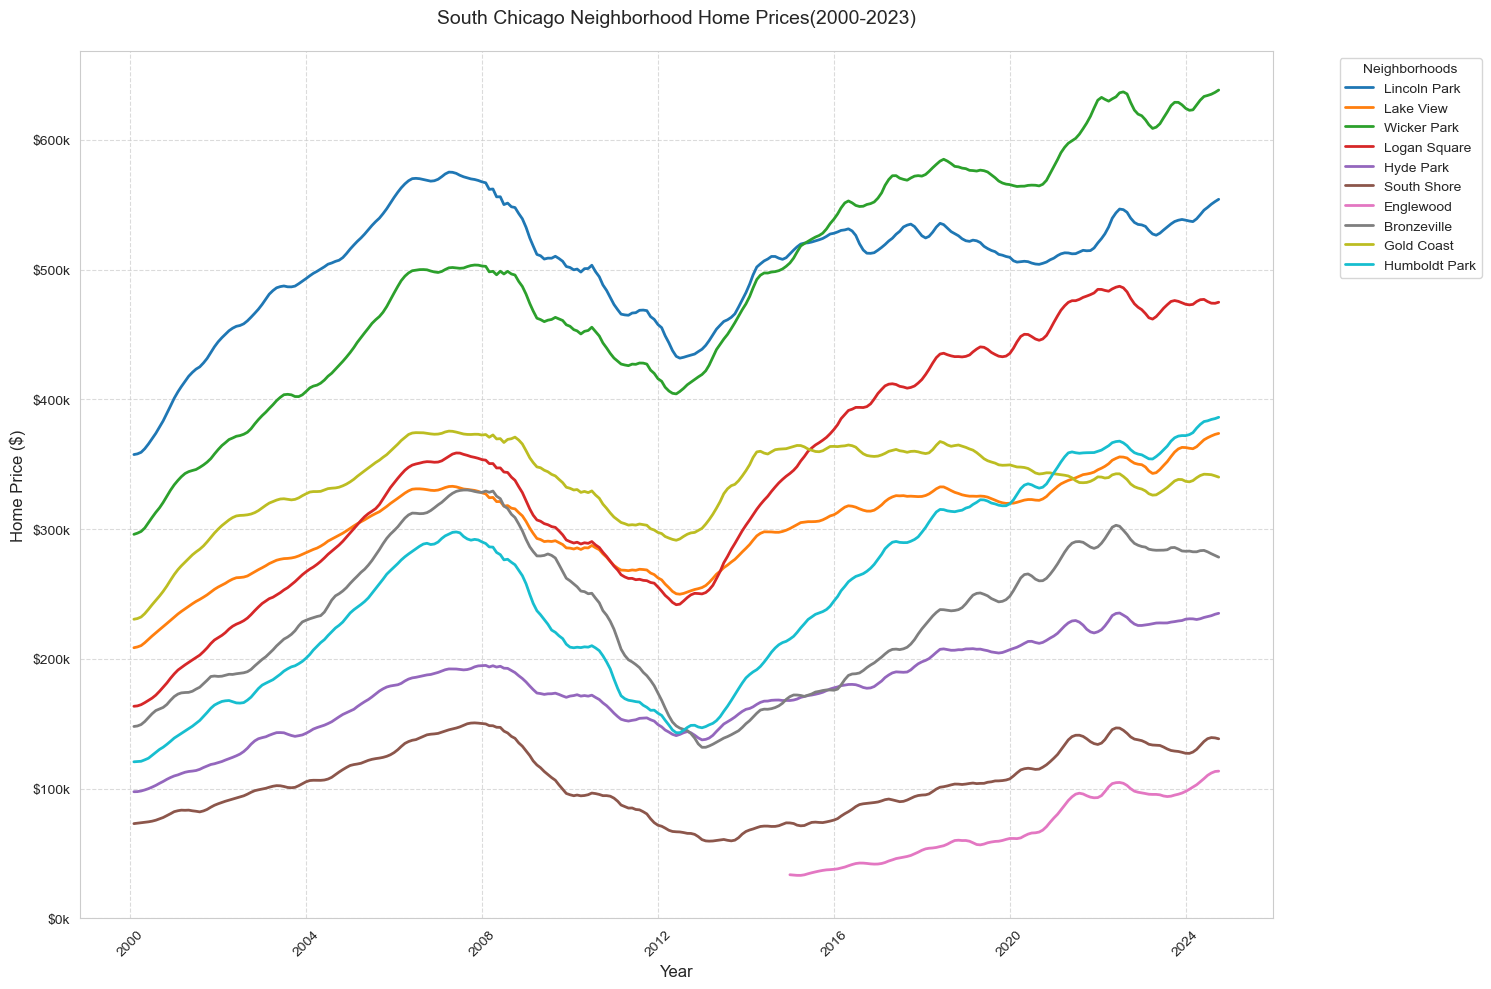

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_chicago_housing_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

neighborhoods = [
    'Lincoln Park',    
    'Lake View',       
    'Wicker Park',     
    'Logan Square',    
    'Hyde Park',       
    'South Shore',     
    'Englewood',       
    'Bronzeville',     
    'Gold Coast',      
    'Humboldt Park'    
]

# neighborhoods = [
#     'Kenwood',    
#     'Chinatown',       
#     'Pilsen',     
#     'Bridgeport',    
#     'University Village - Little Italy',       
#     'Brownzeville',     
#     'Hyde Park',
#     'Englewood',
#     'South Chicago',     
#     'East Side',
# ]

plt.figure(figsize=(15, 10))  # Made figure larger

for neighborhood in neighborhoods:
    neighborhood_data = df[df['RegionName'] == neighborhood]
    plt.plot(neighborhood_data['Date'], 
            neighborhood_data['Price'], 
            label=neighborhood, 
            linewidth=2)

plt.title('South Chicago Neighborhood Home Prices(2000-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Home Price ($)', fontsize=12)
plt.legend(title='Neighborhoods', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}k'))
plt.tight_layout()
plt.ylim(bottom=0)

plt.show()

### Hypothesis
Prices of homes in Chicago neighborhoods that had a rapid rise (steep peaks) before the 2008 financial crisis are more likely to rebound strongly and exceed their pre-2008 peaks. However, Chicago neighborhoods that experienced more flat growth than rapid growth prior to the 2008 financial crisis are likely to experience a longer recovery period, if they ever do.

### Hypothesis Explanation
Our team thought this was an interesting hypothesis to investigate because the 2008 financial crisis had a great impact on real estate, and Chicago neighborhoods likely experienced varied recovery patterns based on their unique socioeconomic factors. Analyzing how certain neighborhoods recovered could reveal patterns linked to factors such as investment attractiveness, neighborhood amenities, and demographic shifts. By investigating this hypothesis, we could explore if certain neighborhoods demonstrate resilience or are "recession-proof".


## ML Analysis


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('cleaned_chicago_housing_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

price_labels = ['Low', 'Medium', 'High']
df['PriceTier'] = pd.qcut(df['Price'], q=3, labels=price_labels)

le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['RegionName'])

features = ['Year', 'Month', 'Neighborhood']
X = df[features]
y = df['PriceTier']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5042326461507818

Classification Report:
               precision    recall  f1-score   support

        High       0.49      0.75      0.59      3393
         Low       0.51      0.52      0.52      3333
      Medium       0.54      0.24      0.33      3315

    accuracy                           0.50     10041
   macro avg       0.51      0.50      0.48     10041
weighted avg       0.51      0.50      0.48     10041



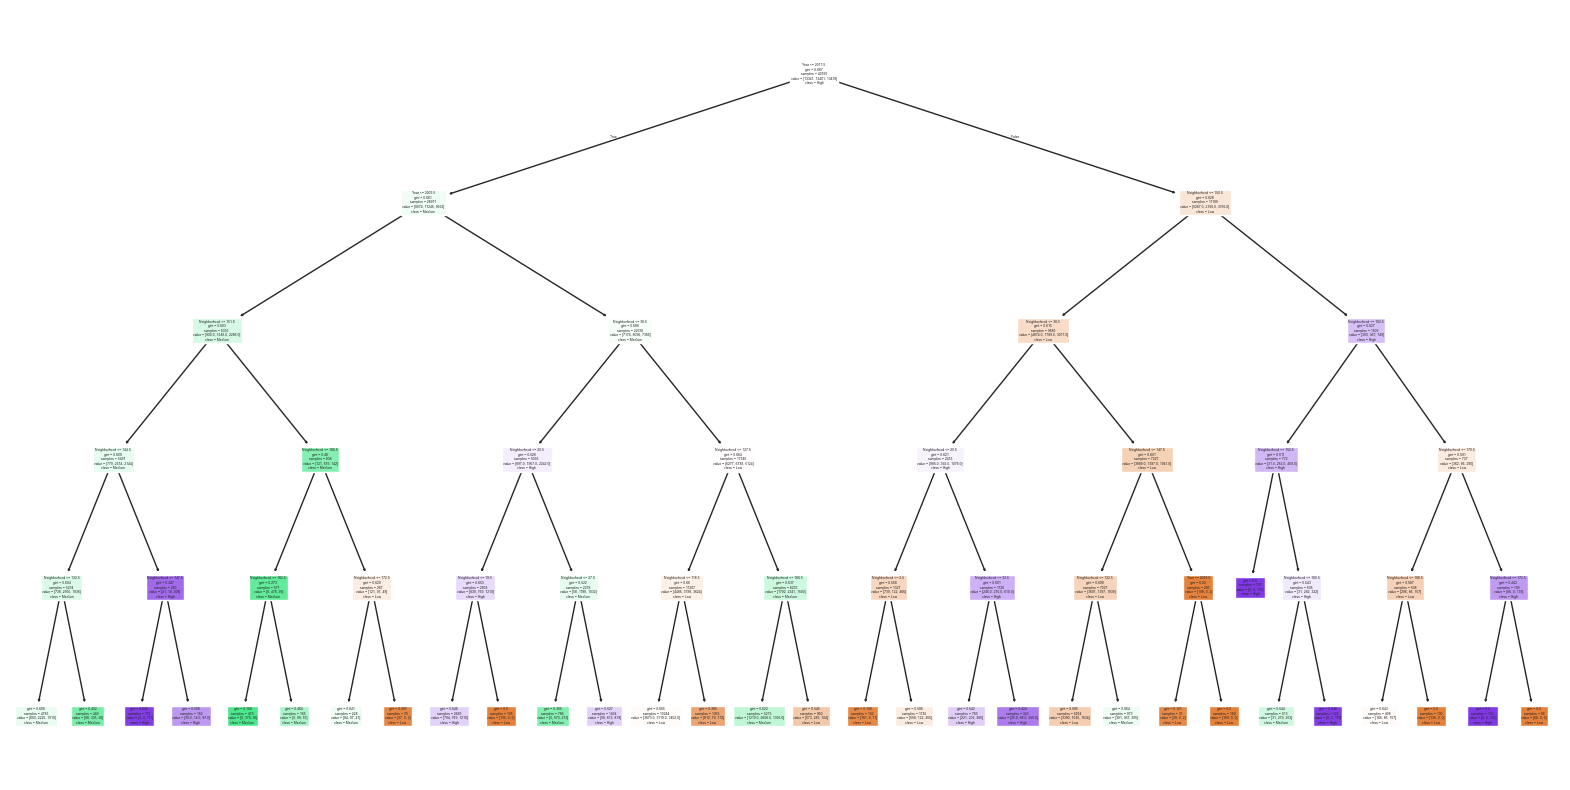

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=price_labels, filled=True)
plt.show()

This model is a classification decision tree that categorizes the prices of houses into low, medium or high based off of neighborhood, year and month. This is our prototype model that we will analyze for accuracy and address issues such as overfitting in the future. So far, the model categorizes the houses into three bins, and we’re exploring the idea of also creating a linear regression tree that can predict house prices as a continuous variable.


Model Evaluation:
Mean Squared Error (MSE): 8256629.86
Mean Absolute Error (MAE): 1808.62
R-squared (R2 Score): 1.00


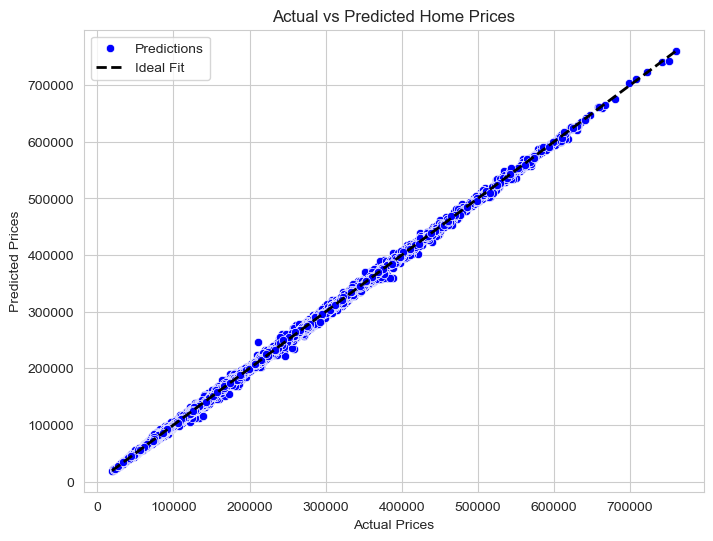

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_chicago_housing_data.csv')
df = df.dropna()

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

features = ['Year', 'Month', 'RegionName']
target = 'Price'

X = df[features]
y = df[target]

column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['RegionName'])
    ],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices')
plt.legend()
plt.show()

## Reflection

**What is the hardest part of the project that you've encountered so far?**
The hardest part we have encountered is creating ML models with the current data we have. We are currently working on creating these models and identifying what aspects (columns) could be useful for a model to make predictions of house prices. The challenge lies in determining which features will be most predictive of housing prices and how to structure our model to capture both temporal trends and neighborhood characteristics. We're also working through the complexity of incorporating historical price data in a way that provides meaningful predictions.

**What are your initial insights?**
Analyzing the current data and visualizations we have so far, we can observe how the value of properties in the area of Chicago have changed over time. For each neighborhood, we can see how the prices went down at around 2006 (the time of the financial crisis), and go up after 2012. Also, we can see how values of properties in certain areas have surpassed other areas. For instance, how Wicker Park is more expensive in 2024 than Lincoln Park based on the visualization above, compared to 2000. This shift in neighborhood valuations reveals interesting patterns about how Chicago's real estate market has evolved over the past two decades, with some traditionally expensive areas being overtaken by rapidly gentrifying neighborhoods.

**Are there any concrete results you can show at this point? If not, why not?**
So far, we can show the visualization we have provided for neighborhoods and their home prices. They tell us how the value of properties in these areas have changed over time. Our scatter plot particularly reveals clear patterns in price appreciation across different neighborhoods, showing distinct clusters of high-growth vs. stable areas. The visualization effectively demonstrates both current prices and historical appreciation rates, providing insights into Chicago's evolving real estate landscape.

**Going forward, what are the current biggest problems you're facing?**
Again, about the ML model, we are still trying to figure out how to work on these, and how they can be improved. The current accuracy of our classification model (50.4%) indicates we need to reassess our approach, possibly switching to a regression model and incorporating more sophisticated features. We're also challenged by how to best capture neighborhood characteristics that might influence price trends.

**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**
We have to dedicate more time to creating the ML model, and determining what factors could be relevant for predicting prices of houses. While our data exploration and visualization work is strong, we need to focus on improving our predictive capabilities. This includes exploring additional features, testing different model architectures, and potentially incorporating external data sources to enhance our predictions.

**Given your initial exploration of the data, is it worth proceeding with your project, why?**
Given what we have seen so far, we think it is worth exploring. We have seen some interesting trends during data exploration and visualization, and we would like to explore what else we can accomplish using this data. Our analysis has revealed significant patterns in neighborhood development and price appreciation that could provide valuable insights for investors and homebuyers. The clear geographic patterns and varying recovery rates from the 2008 crisis suggest there's much more to uncover in this dataset.

## Roles/Coordination

### Team Responsibilities and Timeline
(Timeline refers to weeks after this progress report: November 7, 2024 - December 3, 2024)

**Data Collection and Management**
- Finding and validating data sources: Jonathan, Dhimitri
 * Primary focus on Zillow data quality
 * Research potential supplementary datasets
 * Timeline: Ongoing, with weekly data quality checks

**Analysis and Statistics**
- Statistical analysis: Grazvydas, Dhimitri
 * Time series analysis of price trends
 * Neighborhood comparison studies
 * Market pattern identification
 * Deadline: Weekly updates with major analysis completed by end of Week 3 

**Data Visualization**
- Visualization development: Grazvydas, Reem
 * Create and refine price trend visualizations
 * Develop interactive plots
 * Design presentation graphics
 * Timeline: New visualizations every week with final versions by Week 4

**Machine Learning Development**
- ML model implementation: Reem, Jonathan
 * Model development and testing
 * Feature engineering
 * Performance optimization
 * Target completion: 2 weeks for initial model
 * Additional week for refinements and improvements

## Next Steps
 We plan on revisiting our ML model to see where we can make improvements, and possibly trying to create a regression tree that predicts continuous home prices versus just categorizing them into low medium and high price bins. Also, check where we may have overfit in our original model. We plan to accomplish this and evaluate it based on what our model predicts vs actual values in terms of testing data.
 
Also, thinking about data for the project, we may explore other datasets with information about houses in Chicago that include square footage, number of bedrooms, etc.